In [61]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import keras 
from keras.applications.resnet import ResNet152
from keras.models import Model

In [62]:
col_names = ['class', 'lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s', 'by pass', 
 'extravasates', 'regeneration of', 'early uptake in', 'lym.nodes dimin', 'lym.nodes enlar', 
'changes in lym.', 'defect in node', 'changes in node', 'changes in stru', 'special forms', 
'dislocation of', 'exclusion of no', 'no. of nodes in']

In [63]:
data = pd.read_csv("lymphography.csv") #reading csv file of the data
data

,3,4,2,1,1.1,1.2,1.3,1.4,2.1,1.5,2.2,2.3,2.4,4.1,8,1.6,1.7,2.5,2.6
0,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
1,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
2,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
3,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
4,2,2,1,1,1,1,1,1,2,1,3,3,3,3,6,3,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3,3,2,1,1,2,2,1,2,1,2,2,4,3,5,2,2,2,4
143,2,2,1,1,1,1,1,1,1,1,1,1,1,1,3,1,2,2,1
144,3,2,2,1,1,1,2,1,2,1,3,3,3,3,8,3,2,2,4
145,2,2,1,1,1,1,1,1,2,1,2,2,4,2,2,1,2,2,1


In [64]:
data.shape

(147, 19)

In [65]:
data.isnull().sum()

3      0
4      0
2      0
1      0
1.1    0
1.2    0
1.3    0
1.4    0
2.1    0
1.5    0
2.2    0
2.3    0
2.4    0
4.1    0
8      0
1.6    0
1.7    0
2.5    0
2.6    0
dtype: int64

In [66]:
data.head()

,3,4,2,1,1.1,1.2,1.3,1.4,2.1,1.5,2.2,2.3,2.4,4.1,8,1.6,1.7,2.5,2.6
0,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
1,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
2,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
3,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
4,2,2,1,1,1,1,1,1,2,1,3,3,3,3,6,3,1,2,4


In [67]:
data.describe()

,3,4,2,1,1.1,1.2,1.3,1.4,2.1,1.5,2.2,2.3,2.4,4.1,8,1.6,1.7,2.5,2.6
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,2.448980,2.734694,1.551020,1.176871,1.047619,1.244898,1.510204,1.068027,1.700680,1.061224,2.476190,2.401361,2.972789,2.795918,5.197279,2.340136,1.666667,1.789116,2.605442
std,0.575572,0.813638,0.499091,0.382864,0.213687,0.431497,0.501605,0.252653,0.459526,0.314588,0.838568,0.569305,0.867571,0.757960,2.166493,0.771909,0.473016,0.409331,1.910884
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


In [68]:
X = data.iloc[:, 0:].values #features
y = data.iloc[:, 0].values #labels

In [69]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 


In [71]:
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 

In [72]:
pca = PCA(n_components=2) 
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test)

In [73]:
parameters = {
    "n_neighbors" : [1, 3, 4, 6, 7, 9, 10], 
    'p' : [1, 2, 3]
}

In [74]:
knn = KNeighborsClassifier()

In [75]:
grid_search = GridSearchCV(estimator=knn, 
                          param_grid=parameters, 
                          cv=5)

In [76]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 4, 6, 7, 9, 10], 'p': [1, 2, 3]})

In [77]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=9, p=1)

In [78]:
y_pred = grid_search.predict(X_test)

In [79]:
print("Test Accuracy Score :- ", accuracy_score(y_test, y_pred)) 
print("Train Accuracy Score :- ", accuracy_score(y_train, grid_search.predict(X_train))) 

Test Accuracy Score :-  0.4666666666666667
Train Accuracy Score :-  0.7435897435897436


In [80]:
c = confusion_matrix(y_pred, y_test)

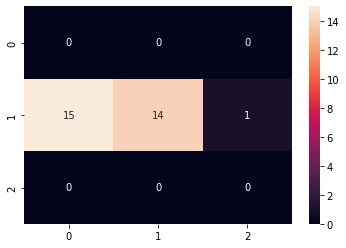

In [81]:
x = sns.heatmap(c, annot = True, fmt = "d") #plotting heatmap for the confusion
plt.show()

In [82]:
model = ResNet152(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [83]:
model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [85]:
data["3"].value_counts()

2    81
3    60
4     4
1     2
Name: 3, dtype: int64

In [86]:
X = data.drop('3', axis=1)
y = data['3']

In [87]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [88]:
X_train.shape

(117, 18)

In [89]:
X_test.shape

(30, 18)